In [4]:
# --- Kd avg (nM) values for each mutation per antibody ---

kd_values = {
    "C143": {
        "V29F": 139.9,
        "K32Y": 31772.0,
        "L51Y": 175.5,
        "A77T": 165.4,
        "G91A": 171.3
    },
    "S309": {
        "P28T": 3.233,
        "T77N": 2.679,
        "G79A": 3.175,
        "R84S": 2.759,
        "R85S": 3.214,
        "R87T": 2.243
    },
    "MEDI8852": {
        "D27F": 1.1051,
        "V35Y": 0.82875,
        "S44G": 0.6557,
        "T53I": 0.71885,
        "W59S": 0.91145,
        "E65P": 0.3973,
        "N74S": 0.6149,
        "M117Y": 0.42905
    }
}


=== Kd Avg Values (nM) ===

C143
  V29F: 139.9
  K32Y: 31772.0
  L51Y: 175.5
  A77T: 165.4
  G91A: 171.3

S309
  P28T: 3.233
  T77N: 2.679
  G79A: 3.175
  R84S: 2.759
  R85S: 3.214
  R87T: 2.243

MEDI8852
  D27F: 1.1051
  V35Y: 0.82875
  S44G: 0.6557
  T53I: 0.71885
  W59S: 0.91145
  E65P: 0.3973
  N74S: 0.6149
  M117Y: 0.42905


In [12]:
import pandas as pd
import os
from collections import defaultdict

# Mutation definitions
mutations = {
    "MEDI8852": ["D27F", "V35Y", "S44G", "T53I", "W59S", "E65P", "N74S", "M117Y"],
    "C143": ["V29F", "K32Y", "L51Y", "D57T", "A77T", "G91A"],
    "S309": ["P28T", "T77N", "G79A", "R84S", "R85S", "R87T"]
}

# Base folder containing subfolders for each antibody
base_path = "./LLR_data"  # <--- change this to your actual data root

# Helper to extract numeric position
def get_position(mutation):
    return int(''.join(filter(str.isdigit, mutation)))

# Helper to extract clean model name
def extract_model_name(file_name, antibody):
    name = file_name.replace(f"{antibody}_", "")
    name = name.replace("facebook_", "").replace("hugohrban_", "")
    name = name.replace("_llr.csv", "")
    return name

# Result storage: {antibody -> {mutation -> [(model_name, llr), ...]}}
llr_results = defaultdict(lambda: defaultdict(list))

# Process each antibody
for antibody, muts in mutations.items():
    folder_path = os.path.join(base_path, antibody)
    if not os.path.isdir(folder_path):
        print(f"Folder not found: {folder_path}")
        continue

    for file_name in os.listdir(folder_path):
        if not file_name.endswith(".csv"):
            continue

        file_path = os.path.join(folder_path, file_name)
        model_name = extract_model_name(file_name, antibody)

        df = pd.read_csv(file_path)

        for mut in muts:
            position = get_position(mut)
            col_index = position - 1  # assuming 1-based indexing

            try:
                llr = df.iloc[0, col_index]
                llr_results[antibody][mut].append((model_name, llr))
            except IndexError:
                llr_results[antibody][mut].append((model_name, "IndexError"))

# Print the results
for antibody, mut_values in llr_results.items():
    print(f"\n{antibody}")
    for mut, entries in mut_values.items():
        print(f"  {mut}:")
        for model_name, llr in entries:
            print(f"    {model_name}: {llr}")



MEDI8852
  D27F:
    esm1b_t33_650M_UR50S: -5.641163751482964
    esm2_t33_650M_UR50D: -7.028448010329157
    esm2_t36_3B_UR50D: -7.59190165437758
    progen2-large: -3.1158015727996826
    esm2_t6_8M_UR50D: 0.116243839263916
    progen2-medium: -1.8530731201171875
    progen2-oas: -3.7029038071632394
    progen2-small: -1.0269012451171875
  V35Y:
    esm1b_t33_650M_UR50S: 0.0
    esm2_t33_650M_UR50D: 0.0
    esm2_t36_3B_UR50D: 0.0
    progen2-large: 1.0504934787750244
    esm2_t6_8M_UR50D: 0.0
    progen2-medium: 0.2810592651367187
    progen2-oas: 3.1482010185718536
    progen2-small: 0.5063629150390625
  S44G:
    esm1b_t33_650M_UR50S: -2.562242195010185
    esm2_t33_650M_UR50D: -3.677783578634262
    esm2_t36_3B_UR50D: -0.6646530628204346
    progen2-large: -2.5922261476516724
    esm2_t6_8M_UR50D: -0.6344132423400879
    progen2-medium: -0.1648712158203125
    progen2-oas: -4.8417203687131405
    progen2-small: 0.0788421630859375
  T53I:
    esm1b_t33_650M_UR50S: 0.15504455566406

In [18]:
# Kd avg values
kd_values = {
    "MEDI8852": {
        "D27F": 1.1051, "V35Y": 0.82875, "S44G": 0.6557, "T53I": 0.71885,
        "W59S": 0.91145, "E65P": 0.3973, "N74S": 0.6149, "M117Y": 0.42905
    },
    "C143": {
        "V29F": 139.9, "K32Y": 31772.0, "L51Y": 175.5, "D57T": None,
        "A77T": 165.4, "G91A": 171.3
    },
    "S309": {
        "P28T": 3.233, "T77N": 2.679, "G79A": 3.175, "R84S": 2.759,
        "R85S": 3.214, "R87T": 2.243
    }
}

# Create DataFrames
antibody_dfs = {}

for antibody, mut_data in llr_results.items():
    rows = []
    for mut, model_llrs in mut_data.items():
        kd = kd_values.get(antibody, {}).get(mut)
        for model_name, llr in model_llrs:
            if isinstance(llr, (float, int)):  # exclude errors or non-numeric
                rows.append({
                    "Model": model_name,
                    "Mutation": mut,
                    "LLR": llr,
                    "Kd_avg": kd
                })
    df = pd.DataFrame(rows)
    antibody_dfs[antibody] = df

pd.set_option("display.max_rows", None)

# Assign individual DataFrames
df_medi8852 = antibody_dfs["MEDI8852"]
df_c143 = antibody_dfs["C143"]
df_s309 = antibody_dfs["S309"]

print("\nMEDI8852 DataFrame:")
print(df_medi8852)

print("\nC143 DataFrame:")
print(df_c143)

print("\nS309 DataFrame:")
print(df_s309)



MEDI8852 DataFrame:
                   Model Mutation       LLR   Kd_avg
0   esm1b_t33_650M_UR50S     D27F -5.641164  1.10510
1    esm2_t33_650M_UR50D     D27F -7.028448  1.10510
2      esm2_t36_3B_UR50D     D27F -7.591902  1.10510
3          progen2-large     D27F -3.115802  1.10510
4       esm2_t6_8M_UR50D     D27F  0.116244  1.10510
5         progen2-medium     D27F -1.853073  1.10510
6            progen2-oas     D27F -3.702904  1.10510
7          progen2-small     D27F -1.026901  1.10510
8   esm1b_t33_650M_UR50S     V35Y  0.000000  0.82875
9    esm2_t33_650M_UR50D     V35Y  0.000000  0.82875
10     esm2_t36_3B_UR50D     V35Y  0.000000  0.82875
11         progen2-large     V35Y  1.050493  0.82875
12      esm2_t6_8M_UR50D     V35Y  0.000000  0.82875
13        progen2-medium     V35Y  0.281059  0.82875
14           progen2-oas     V35Y  3.148201  0.82875
15         progen2-small     V35Y  0.506363  0.82875
16  esm1b_t33_650M_UR50S     S44G -2.562242  0.65570
17   esm2_t33_650M_UR50D 

In [19]:
# Group by model name for each antibody
grouped_medi8852 = df_medi8852.groupby("Model")
grouped_c143 = df_c143.groupby("Model")
grouped_s309 = df_s309.groupby("Model")

# Example: print each model group for MEDI8852
print("\n=== Grouped by Model: MEDI8852 ===")
for model, group in grouped_medi8852:
    print(f"\nModel: {model}")
    print(group)

print("\n=== Grouped by Model: C143 ===")
for model, group in grouped_c143:
    print(f"\nModel: {model}")
    print(group)

print("\n=== Grouped by Model: S309 ===")
for model, group in grouped_s309:
    print(f"\nModel: {model}")
    print(group)



=== Grouped by Model: MEDI8852 ===

Model: esm1b_t33_650M_UR50S
                   Model Mutation       LLR   Kd_avg
0   esm1b_t33_650M_UR50S     D27F -5.641164  1.10510
8   esm1b_t33_650M_UR50S     V35Y  0.000000  0.82875
16  esm1b_t33_650M_UR50S     S44G -2.562242  0.65570
24  esm1b_t33_650M_UR50S     T53I  0.155045  0.71885
32  esm1b_t33_650M_UR50S     W59S -1.781130  0.91145
40  esm1b_t33_650M_UR50S     E65P  0.000000  0.39730
48  esm1b_t33_650M_UR50S     N74S -3.459799  0.61490
56  esm1b_t33_650M_UR50S    M117Y -4.177236  0.42905

Model: esm2_t33_650M_UR50D
                  Model Mutation       LLR   Kd_avg
1   esm2_t33_650M_UR50D     D27F -7.028448  1.10510
9   esm2_t33_650M_UR50D     V35Y  0.000000  0.82875
17  esm2_t33_650M_UR50D     S44G -3.677784  0.65570
25  esm2_t33_650M_UR50D     T53I -0.689275  0.71885
33  esm2_t33_650M_UR50D     W59S -2.191400  0.91145
41  esm2_t33_650M_UR50D     E65P  0.000000  0.39730
49  esm2_t33_650M_UR50D     N74S -4.623094  0.61490
57  esm2_t33_6

In [20]:
from scipy.stats import spearmanr

def run_spearman(grouped_df, antibody_name):
    print(f"\n=== Spearman Correlation for {antibody_name} ===")
    for model, group in grouped_df:
        # Drop rows with missing Kd_avg or non-numeric LLRs
        filtered = group.dropna(subset=["LLR", "Kd_avg"])

        if len(filtered) < 2:
            print(f"\nModel: {model} — Not enough data for correlation")
            continue

        llr_vals = filtered["LLR"].astype(float)
        kd_vals = filtered["Kd_avg"].astype(float)

        rho, pval = spearmanr(llr_vals, kd_vals)

        print(f"\nModel: {model}")
        print(f"  Spearman rho = {rho:.4f}")
        print(f"  p-value      = {pval:.4f}")


In [21]:
run_spearman(grouped_medi8852, "MEDI8852")
run_spearman(grouped_c143, "C143")
run_spearman(grouped_s309, "S309")



=== Spearman Correlation for MEDI8852 ===

Model: esm1b_t33_650M_UR50S
  Spearman rho = -0.1078
  p-value      = 0.7995

Model: esm2_t33_650M_UR50D
  Spearman rho = -0.2515
  p-value      = 0.5479

Model: esm2_t36_3B_UR50D
  Spearman rho = -0.2755
  p-value      = 0.5091

Model: esm2_t6_8M_UR50D
  Spearman rho = -0.0599
  p-value      = 0.8880

Model: progen2-large
  Spearman rho = 0.0000
  p-value      = 1.0000

Model: progen2-medium
  Spearman rho = -0.0952
  p-value      = 0.8225

Model: progen2-oas
  Spearman rho = -0.0238
  p-value      = 0.9554

Model: progen2-small
  Spearman rho = -0.5476
  p-value      = 0.1600

=== Spearman Correlation for C143 ===

Model: esm1b_t33_650M_UR50S
  Spearman rho = 0.6000
  p-value      = 0.2848

Model: esm2_t33_650M_UR50D
  Spearman rho = 0.6000
  p-value      = 0.2848

Model: esm2_t36_3B_UR50D
  Spearman rho = 0.7000
  p-value      = 0.1881

Model: esm2_t6_8M_UR50D
  Spearman rho = 0.6000
  p-value      = 0.2848

Model: progen2-large
  Spearman

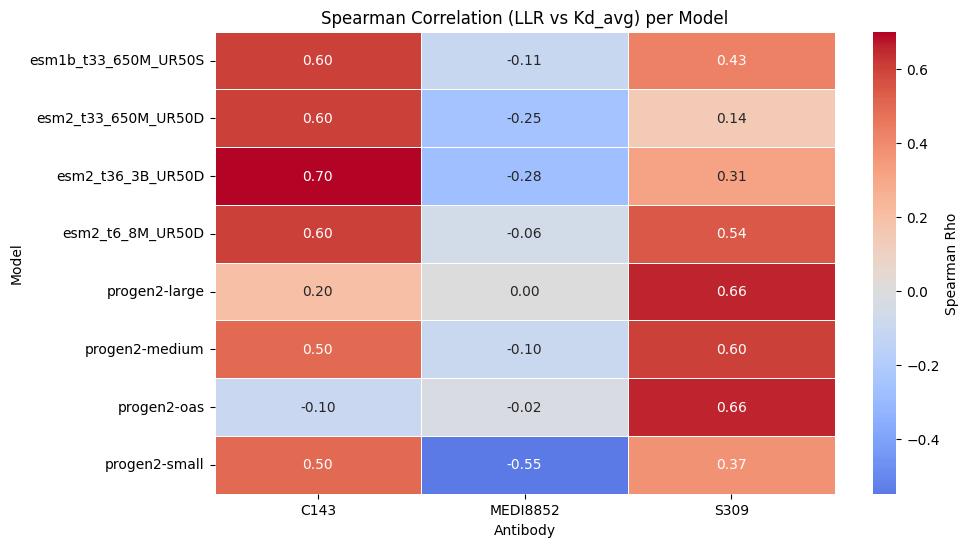

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO

data = {
    "MEDI8852": {
        "esm1b_t33_650M_UR50S": (-0.1078, 0.7995),
        "esm2_t33_650M_UR50D": (-0.2515, 0.5479),
        "esm2_t36_3B_UR50D": (-0.2755, 0.5091),
        "esm2_t6_8M_UR50D": (-0.0599, 0.8880),
        "progen2-large": (0.0000, 1.0000),
        "progen2-medium": (-0.0952, 0.8225),
        "progen2-oas": (-0.0238, 0.9554),
        "progen2-small": (-0.5476, 0.1600),
    },
    "C143": {
        "esm1b_t33_650M_UR50S": (0.6000, 0.2848),
        "esm2_t33_650M_UR50D": (0.6000, 0.2848),
        "esm2_t36_3B_UR50D": (0.7000, 0.1881),
        "esm2_t6_8M_UR50D": (0.6000, 0.2848),
        "progen2-large": (0.2000, 0.7471),
        "progen2-medium": (0.5000, 0.3910),
        "progen2-oas": (-0.1000, 0.8729),
        "progen2-small": (0.5000, 0.3910),
    },
    "S309": {
        "esm1b_t33_650M_UR50S": (0.4286, 0.3965),
        "esm2_t33_650M_UR50D": (0.1429, 0.7872),
        "esm2_t36_3B_UR50D": (0.3143, 0.5441),
        "esm2_t6_8M_UR50D": (0.5429, 0.2657),
        "progen2-large": (0.6571, 0.1562),
        "progen2-medium": (0.6000, 0.2080),
        "progen2-oas": (0.6571, 0.1562),
        "progen2-small": (0.3714, 0.4685),
    }
}

# Prepare a DataFrame
records = []
for antibody, models in data.items():
    for model, (rho, pval) in models.items():
        records.append({"Antibody": antibody, "Model": model, "Rho": rho, "p-value": pval})

df = pd.DataFrame(records)

# Create a heatmap-like plot with annotations
pivot_rho = df.pivot(index="Model", columns="Antibody", values="Rho")

plt.figure(figsize=(10, 6))
ax = sns.heatmap(pivot_rho, annot=True, fmt=".2f", cmap="coolwarm", center=0, linewidths=.5, cbar_kws={"label": "Spearman Rho"})
plt.title("Spearman Correlation (LLR vs Kd_avg) per Model")
plt.ylabel("Model")
plt.xlabel("Antibody")
plt.savefig("spearmanCorrelationLLRkd.png", format="png", dpi=300, bbox_inches='tight')
plt.show()
